Causal Inference using DID
Treatment effect of billardboard on deposits
Reference: https://matheusfacure.github.io/python-causality-handbook/13-Difference-in-Differences.html

In [1]:
import pandas as pd
import numpy as np
from matplotlib import style
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf


%matplotlib inline

style.use("fivethirtyeight")

In [3]:
data = pd.read_csv("data/billboard_impact.csv")
data.head()
# two locations: poa and fl
# treatment happens in June

,deposits,poa,jul
0,42,1,0
1,0,1,0
2,52,1,0
3,119,1,0
4,21,1,0


In [6]:
poa_before=data.query('poa==1 & jul==0')['deposits'].mean()
poa_after=data.query('poa==1 & jul==1')['deposits'].mean()
fl_before=data.query('poa==0 & jul==0')['deposits'].mean()
fl_after=data.query('poa==0 & jul==1')['deposits'].mean()

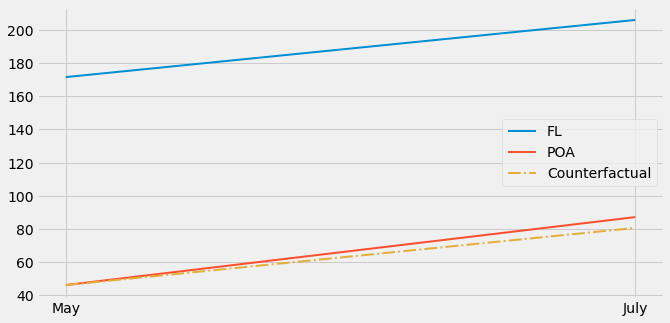

In [12]:
# plot of the data
plt.figure(figsize=(10,5))
plt.plot(['May','July'],[fl_before, fl_after], label='FL',lw=2)
plt.plot(['May','July'],[poa_before, poa_after],label='POA',lw=2)
plt.plot(['May','July'],[poa_before, poa_before+(fl_after-fl_before)],
         label='Counterfactual', lw=2, ls='-.')
plt.legend()

## Estimate treatment effect with linear regression

$
Y_i=\beta_0+\beta_1 POA_i+\beta_2 July_i+\beta_3 POA_i July_i+\epsilon_i,
$
where $\beta_3$ is the unbiased estimator of the treatment effect.

In [16]:
smf.ols('deposits ~ poa*jul', data=data).fit().summary()
# treatment effect is $6.5246

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               deposits   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     696.7
Date:                Fri, 08 Apr 2022   Prob (F-statistic):               0.00
Time:                        20:59:34   Log-Likelihood:                -26973.
No. Observations:                4600   AIC:                         5.395e+04
Df Residuals:                    4596   BIC:                         5.398e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    171.6423      2.363     72.625      0.000     167.009     176.276
poa         -125.6263      4.484    -28.015      0.000    -134.418    -116.835
jul           34.5232      3.036     11.372      0.000      28.571      40.475
poa:jul        6.5246      5.729      1.139      0.255      -4.706      17.755
==============================================================================
Omnibus:                      184.879   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.379
Skew:                          -0.400   Prob(JB):                     1.29e-56
Kurtosis:                       3.838   Cond. No.                         7.24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""